In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def d2d(a,x):
    return a-a*np.exp(-1.0*value* N * x)+a*x*np.exp(-1.0*value* N * x)

def zipf_distribute(alpha, file_number):
    ans = [0 for i in range(file_number)]
    sum = 0
    for i in range(1, file_number + 1):
        sum += 1 / pow(i, alpha)
    for i in range(1, file_number + 1):
        ans[i - 1] = (1 / pow(i, alpha)) / sum
    return ans

def all_d2d(results,f_func):
    ans=0
    for i in range(len(results)):

        ans+=f_func(zipf_n[i],results[i])
    return ans

def d2d_grad(a,x):
    return value*N*a*np.exp(-1.0*value* N * x)-a*x*value*np.exp(-1.0* N *value* x)+a*np.exp(-1.0*value* N * x)


def gd_d2d(results,f_grad):
    ans = np.copy(results)
    for i in range(len(results)):
        if ans[i]>=1:
            continue
        ans[i]=ans[i]+eta*f_grad(zipf_n[i],ans[i])
    return ans

def train_d2d(trainer,step=100,f_grad=None):
    results=np.zeros(M)
    for i in range(step):
        if results.sum()>cap:
            break
        results=np.copy(trainer(results,f_grad))
    return results

In [40]:
def d2d_gd():
    k = cap*M*10
    results = np.zeros(M)
    for i in range(k):
        max=0
        index=0
        for j in range(len(results)):
            if d2d(zipf_n[j],results[j]+lr)-d2d(zipf_n[j],results[j])>max:
                max =d2d(zipf_n[j],results[j]+lr)-d2d(zipf_n[j],results[j])
                index=j


        results[index]+=lr
    return results

In [30]:
result = train_d2d(gd_d2d,100000,d2d_grad)

In [9]:
0.8241396151213398  #贪心放置
0.7937300235089196  #梯度下降
0.51114             #粒子群

0.51114

In [10]:
#所有的变量 N,M,alpha,lm
N_variable = np.arange(50,150,10)
M_variable = np.arange(50,150,10)
alpha_variable = np.arange(0.5,1.5,0.1)
lm_variable = np.arange(0.6,0.9,0.05)
C_variable = np.arange(3,6,1)

In [19]:
dim = 100
M=dim
c1 = 1.4
c2 = 1.4
max_gen = 500
size_pop =1000
V_max = 0.001
V_min = -0.001
pop_max = 1
pop_min = 0
w = 0.8
record = np.zeros(max_gen)
alpha = 1.5
zipf_n = zipf_distribute(alpha,dim)
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3

In [23]:
#N结果向量存储
N_result_ga=np.zeros(len(N_variable))
N_result_PSO=np.zeros(len(N_variable))
N_result_GD=np.zeros(len(N_variable))
N_result_DE=np.zeros(len(N_variable))
N_result_MPC=np.zeros(len(N_variable))
N_result_EPRC=np.zeros(len(N_variable))

In [45]:
#结果
print('其他默认参数：','M=',M,'  D2D半径和BS半径比:',value,'  用户缓存大小：', cap)
N_i=0
for i in N_variable:
    zipf_n = zipf_distribute(alpha,M)
    N=i
    result_gd = d2d_gd()
    ans=all_d2d(result_gd,d2d)
    N_result_ga[N_i]=ans
    N_i +=1
    print('N=',N,'\n','命中概率',ans)

print(N_result_ga)
N_i=0

其他默认参数： M= 110   D2D半径和BS半径比: 0.09   用户缓存大小： 3
N= 50 
 命中概率 0.7629375857221877
N= 60 
 命中概率 0.7809853868709197
N= 70 
 命中概率 0.7964538483933448
N= 80 
 命中概率 0.8098356047713982
N= 90 
 命中概率 0.8215300118658049
N= 100 
 命中概率 0.8318487450064445
N= 110 
 命中概率 0.841033636689749
N= 120 
 命中概率 0.8492733624760863
N= 130 
 命中概率 0.8567169432224607
N= 140 
 命中概率 0.8634832534239371
[0.76293759 0.78098539 0.79645385 0.8098356  0.82153001 0.83184875
 0.84103364 0.84927336 0.85671694 0.86348325]


In [38]:
#MPC EPRC
N_i=0
for i in N_variable:
    N=i
    result_EPRC=np.ones(M)*(cap/M)
    ans=all_d2d(result_EPRC,d2d)
    N_result_MPC[N_i]=ans
    N_i +=1
    print('N=',N,'\n','命中概率',ans)

N_i=0
for i in N_variable:
    N=i
    result_MPC=np.zeros(M)
    for j in range(cap):
        result_MPC[j]=1
    ans=all_d2d(result_MPC,d2d)
    N_result_MPC[N_i]=ans
    N_i +=1
    print('N=',N,'\n','命中概率',ans)

N= 50 
 命中概率 0.15249556566260652
N= 60 
 命中概率 0.17507203159597376
N= 70 
 命中概率 0.19704708850610825
N= 80 
 命中概率 0.21843675718272454
N= 90 
 命中概率 0.2392566316415901
N= 100 
 命中概率 0.2595218904932522
N= 110 
 命中概率 0.279247308008918
N= 120 
 命中概率 0.2984472648915523
N= 130 
 命中概率 0.3171357587600473
N= 140 
 命中概率 0.3353264143541053
N= 50 
 命中概率 0.6407311020304444
N= 60 
 命中概率 0.6407311020304444
N= 70 
 命中概率 0.6407311020304444
N= 80 
 命中概率 0.6407311020304444
N= 90 
 命中概率 0.6407311020304444
N= 100 
 命中概率 0.6407311020304444
N= 110 
 命中概率 0.6407311020304444
N= 120 
 命中概率 0.6407311020304444
N= 130 
 命中概率 0.6407311020304444
N= 140 
 命中概率 0.6407311020304444


In [ ]:
#PSO
#DE
#matlab出来

In [33]:
#重制默认值
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3

In [44]:
#M结果向量存储
M_result_ga=np.zeros(len(M_variable))
M_result_PSO=np.zeros(len(M_variable))
M_result_GD=np.zeros(len(M_variable))
M_result_DE=np.zeros(len(M_variable))
M_result_MPC=np.zeros(len(M_variable))
M_result_EPRC=np.zeros(len(M_variable))

In [46]:
print('其他默认参数：','N=',N,'  D2D半径和BS半径比:',value,'  用户缓存大小：', cap)
M_i=0
for i in M_variable:
    M=i
    zipf_n = zipf_distribute(alpha,M)
    result_gd = d2d_gd()
    ans=all_d2d(result_gd,d2d)
    M_result_ga[M_i]=ans
    M_i +=1
    print('M=',M,'\n','命中概率',ans)

print(N_result_ga)

其他默认参数： N= 140   D2D半径和BS半径比: 0.09   用户缓存大小： 3
M= 50 
 命中概率 0.8023734641246975
M= 60 
 命中概率 0.8182292656994503
M= 70 
 命中概率 0.8308064376624563
M= 80 
 命中概率 0.8411001859739037
M= 90 
 命中概率 0.8497279384293589
M= 100 
 命中概率 0.8570959745083494
M= 110 
 命中概率 0.8634832534239371
M= 120 
 命中概率 0.8690899191526702
M= 130 
 命中概率 0.8740629209138965
M= 140 
 命中概率 0.878513311995303
[0.76293759 0.78098539 0.79645385 0.8098356  0.82153001 0.83184875
 0.84103364 0.84927336 0.85671694 0.86348325]


In [48]:
#MPC EPRC

#MPC EPRC
M_i=0
for i in M_variable:
    M=i
    zipf_n = zipf_distribute(alpha,M)
    result_EPRC=np.ones(M)*(cap/M)
    ans=all_d2d(result_EPRC,d2d)
    M_result_MPC[M_i]=ans
    M_i +=1
    print('M=',M,'\n','命中概率',ans)

M_i=0
for i in M_variable:
    M=i
    zipf_n = zipf_distribute(alpha,M)
    result_MPC=np.zeros(M)
    for j in range(cap):
        result_MPC[j]=1
    ans=all_d2d(result_MPC,d2d)
    M_result_MPC[M_i]=ans
    M_i +=1
    print('M=',M,'\n','命中概率',ans)


M= 50 
 命中概率 0.5586316112997687
M= 60 
 命中概率 0.4940377890434474
M= 70 
 命中概率 0.4422266727277523
M= 80 
 命中概率 0.39993735016191634
M= 90 
 命中概率 0.3648547408454449
M= 100 
 命中概率 0.3353264143541053
M= 110 
 命中概率 0.31015469002501855
M= 120 
 命中概率 0.2884558475876694
M= 130 
 命中概率 0.2695661415706149
M= 140 
 命中概率 0.2529786376846505
M= 50 
 命中概率 0.6632532913004995
M= 60 
 命中概率 0.6564079910847895
M= 70 
 命中概率 0.6511735743628517
M= 80 
 命中概率 0.6470081757499925
M= 90 
 命中概率 0.6435940260160106
M= 100 
 命中概率 0.6407311020304444
M= 110 
 命中概率 0.6382865092868991
M= 120 
 命中概率 0.6361681084555402
M= 130 
 命中概率 0.6343097731208899
M= 140 
 命中概率 0.6326626717380046


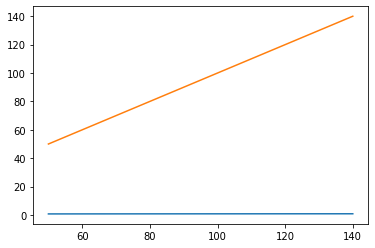

In [32]:
#PSO DE matlab